In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv('/content/anime.csv')
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [4]:
df.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [5]:
df.tail(10)

,anime_id,name,genre,type,episodes,rating,members
12284,26031,Super Erotic Anime,Hentai,OVA,2,4.45,118
12285,34399,Taimanin Asagi 3,"Demons, Hentai, Supernatural",OVA,Unknown,NaN,485
12286,10368,Teleclub no Himitsu,Hentai,OVA,2,4.67,148
12287,9352,Tenshi no Habataki Jun,Hentai,OVA,1,4.33,201
12288,5541,The Satisfaction,Hentai,OVA,1,4.37,166
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [6]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [7]:
df.describe(include='all')

,anime_id,name,genre,type,episodes,rating,members
count,12294.000000,12294,12232,12269,12294,12064.000000,1.229400e+04
unique,NaN,12292,3264,6,187,NaN,NaN
top,NaN,Shi Wan Ge Leng Xiaohua,Hentai,TV,1,NaN,NaN
freq,NaN,2,823,3787,5677,NaN,NaN
mean,14058.221653,NaN,NaN,NaN,NaN,6.473902,1.807134e+04
std,11455.294701,NaN,NaN,NaN,NaN,1.026746,5.482068e+04
min,1.000000,NaN,NaN,NaN,NaN,1.670000,5.000000e+00
25%,3484.250000,NaN,NaN,NaN,NaN,5.880000,2.250000e+02
50%,10260.500000,NaN,NaN,NaN,NaN,6.570000,1.550000e+03
75%,24794.500000,NaN,NaN,NaN,NaN,7.180000,9.437000e+03


In [8]:
# For this project, you might choose to use the anime genres and user ratings as
# features for computing similarity. %%
df.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [9]:
df.duplicated().sum()

0

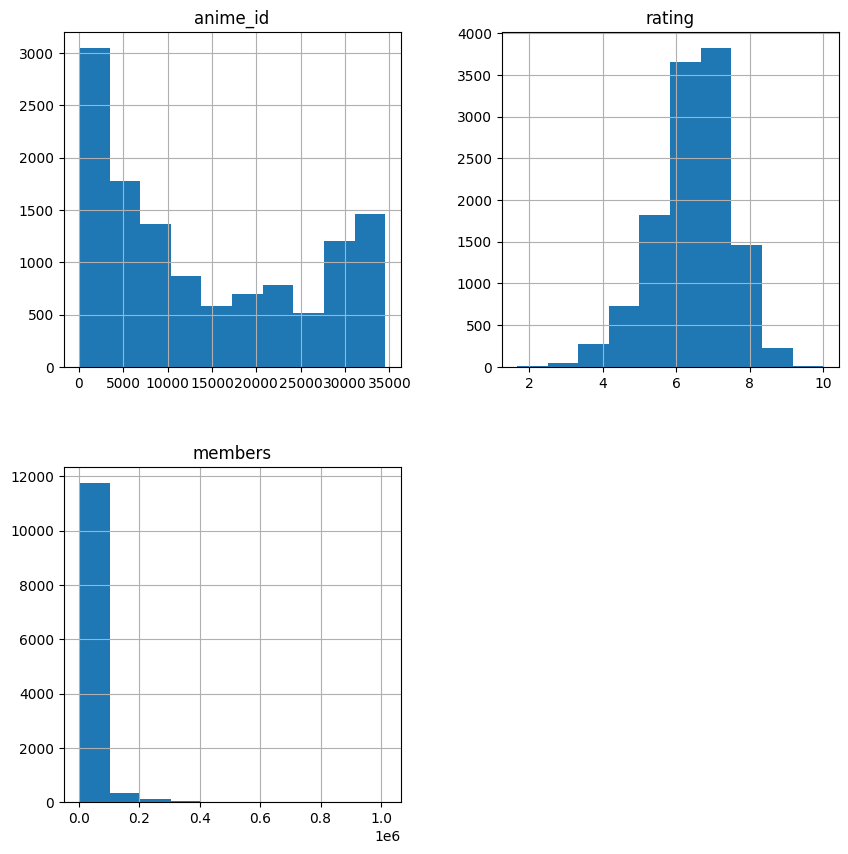

In [10]:
df.hist(figsize=(10,10))
plt.show()

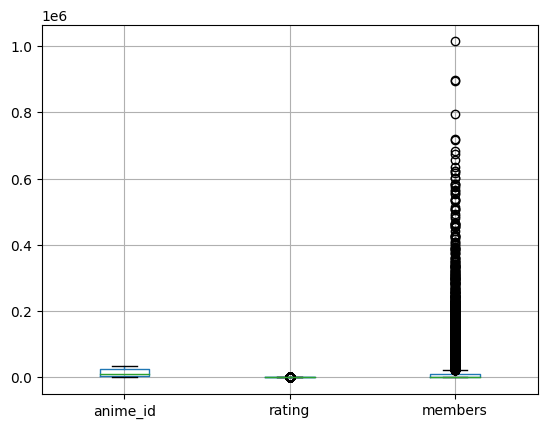

In [11]:
df.boxplot()
plt.show()

In [12]:
 #Import the necessary modules.
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix



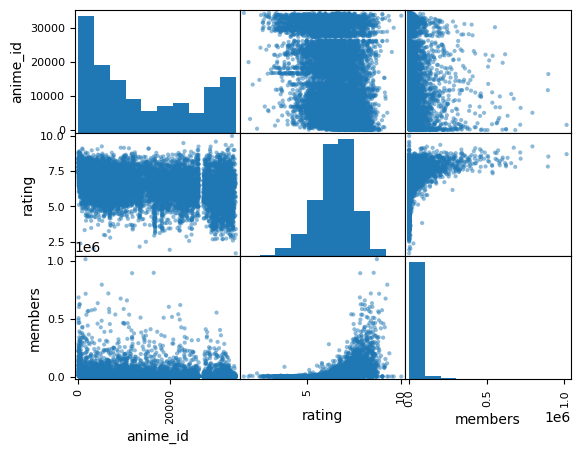

In [13]:
# Generate the scatter matrix.
scatter_matrix(df)

# Display the plot.
plt.show()


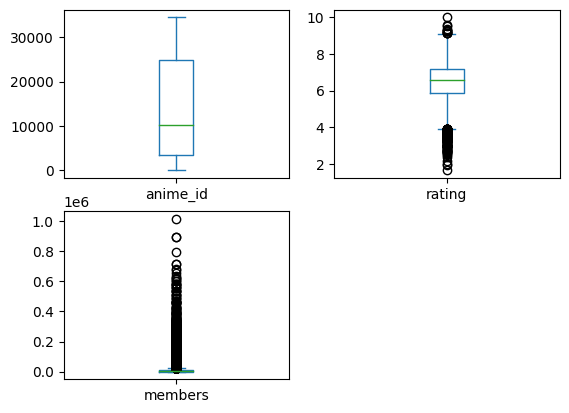

In [14]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [15]:
df.anime_id.value_counts()

,count
anime_id,
32281,1
30404,1
26013,1
26017,1
15787,1
...,...
12455,1
28789,1
373,1


In [16]:
df.anime_id.value_counts().sum()

12294

<Axes: xlabel='anime_id'>

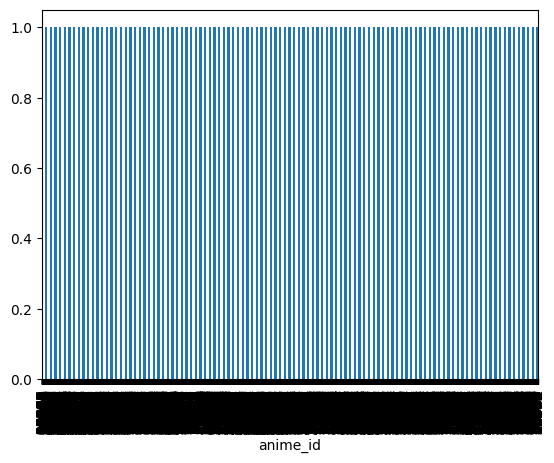

In [17]:
df.anime_id.value_counts().plot(kind='bar')

In [18]:
df.rating.value_counts()


,count
rating,
6.00,141
7.00,99
6.50,90
6.25,84
5.00,76
...,...
3.47,1
3.71,1
3.87,1


In [19]:
df.select_dtypes(include=['number']).corr()


,anime_id,rating,members
anime_id,1.000000,-0.284625,-0.080071
rating,-0.284625,1.000000,0.387979
members,-0.080071,0.387979,1.000000


<Axes: >

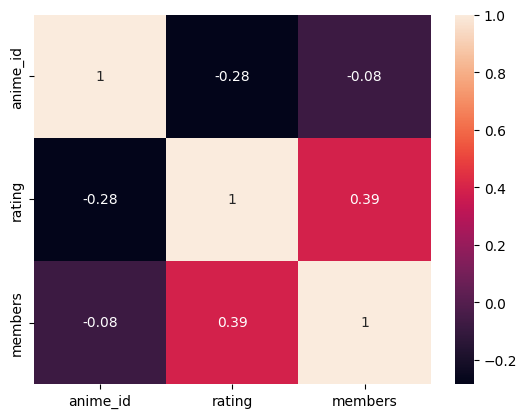

In [20]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)

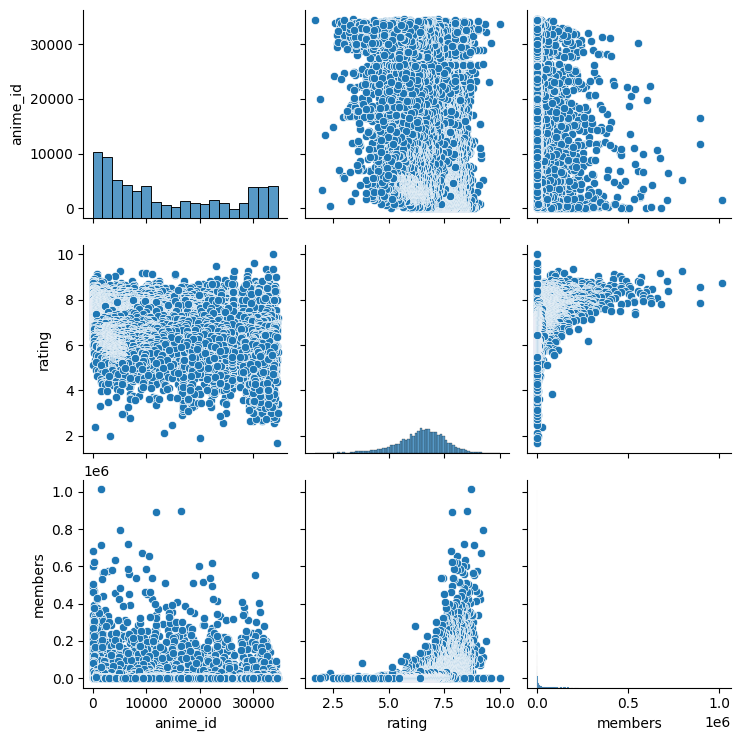

In [21]:
sns.pairplot(df)

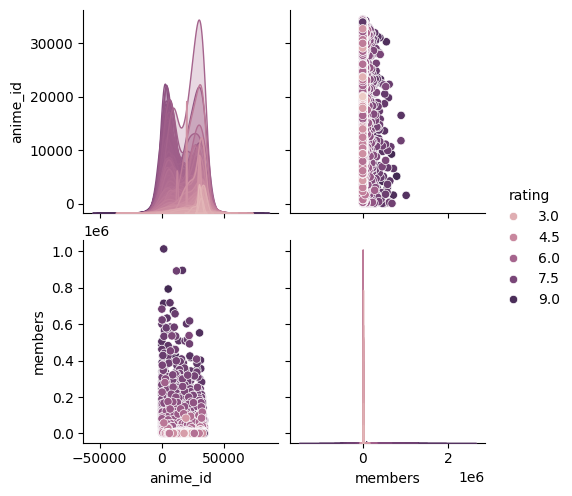

In [22]:
sns.pairplot(df, hue='rating')

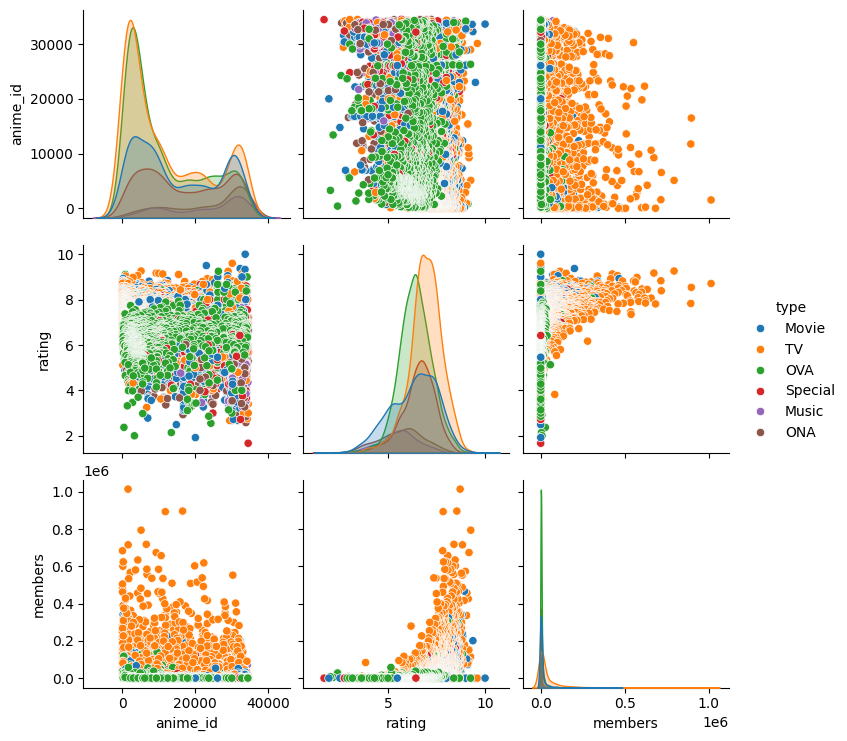

In [23]:
sns.pairplot(df, hue='type')

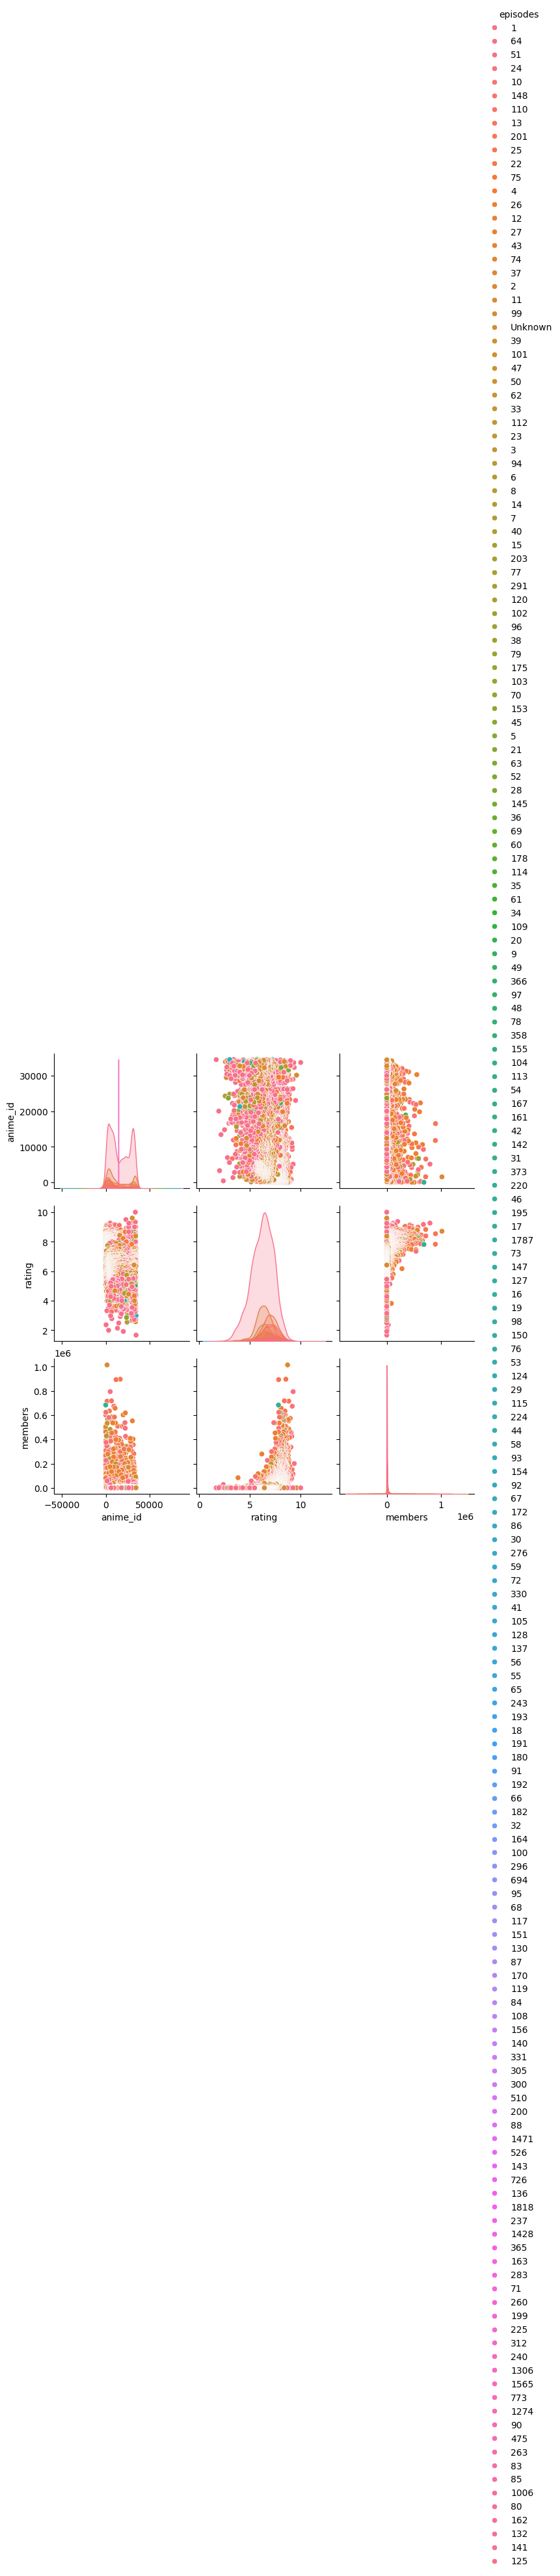

In [24]:
sns.pairplot(df, hue='episodes')

In [25]:
from sklearn.preprocessing import StandardScaler # Make sure to import the StandardScaler class

scaler = StandardScaler() # Use a different variable name like scaler
df_scaled = scaler.fit_transform(df.select_dtypes(include=['number'])) # Use new variable name
df_scaled

array([[ 1.59083812,  2.82077308,  3.33024137],
       [-0.78082543,  2.7136341 , 14.14840622],
       [ 1.30240081,  2.70389419,  1.75471335],
       ...,
       [-0.73656462, -1.55244557, -0.32566298],
       [-0.69186732, -1.45504649, -0.32646563],
       [ 1.04958167, -0.98753091, -0.32706762]])

In [26]:
df.select_dtypes(include=['number']).quantile(0.99) # Select only numerical columns before applying quantile.


,0.99
anime_id,34086.14
rating,8.50
members,276774.30


<Axes: >

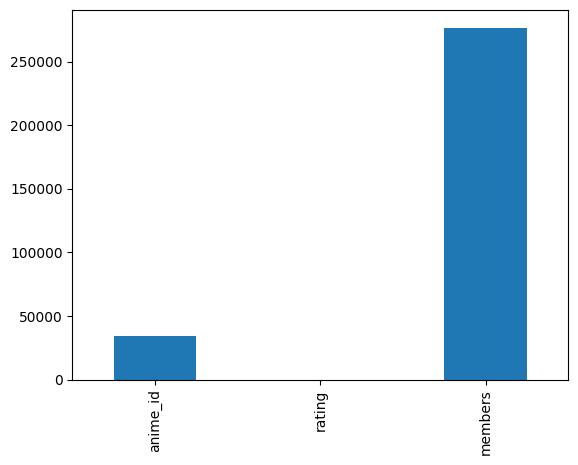

In [27]:
df.select_dtypes(include=['number']).quantile(0.99).plot(kind='bar')

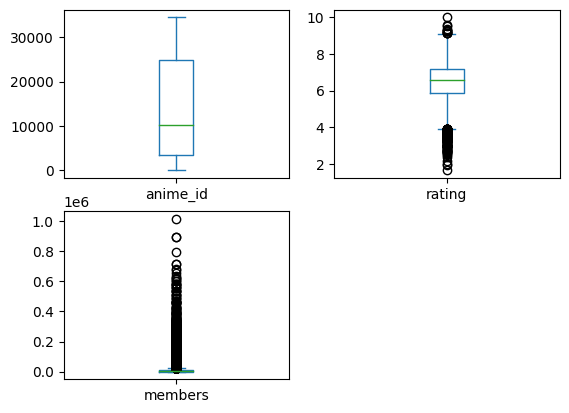

In [28]:
ax=df[df.select_dtypes(include=['number']).columns].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

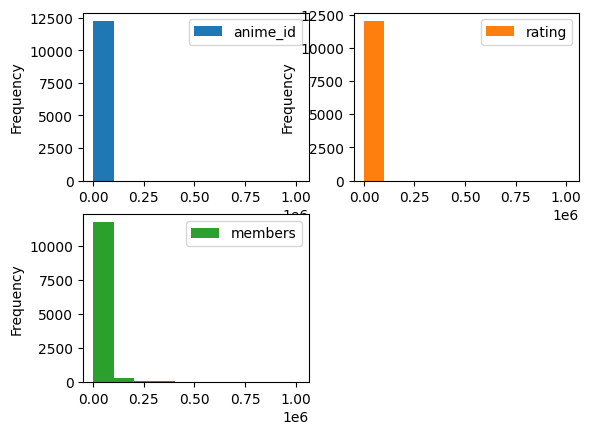

In [29]:
ax=df[df.select_dtypes(include=['number']).columns].plot(kind='hist', subplots=True, layout=(2,2), sharex=False, sharey=False)

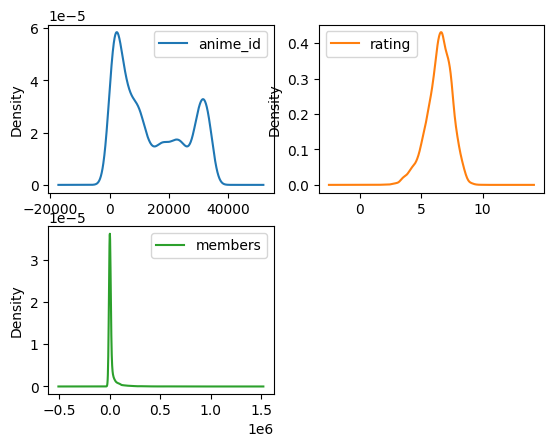

In [30]:
ax=df[df.select_dtypes(include=['number']).columns].plot(kind='kde', subplots=True, layout=(2,2), sharex=False, sharey=False)

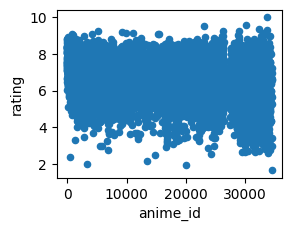

In [31]:
ax=df[df.select_dtypes(include=['number']).columns].plot(kind='scatter', x='anime_id', y='rating', subplots=True, layout=(2,2), sharex=False, sharey=False)

In [32]:
print(df.dtypes)


anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object


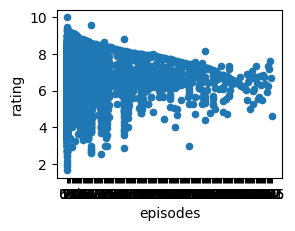

In [33]:
ax = df.plot(kind='scatter', x='episodes', y='rating', subplots=True, layout=(2,2), sharex=False, sharey=False)


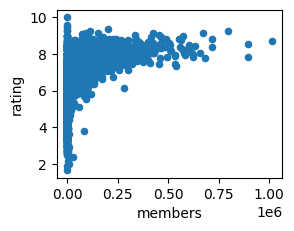

In [34]:
ax=df.plot(kind='scatter', x='members', y='rating', subplots=True, layout=(2,2), sharex=False, sharey=False)

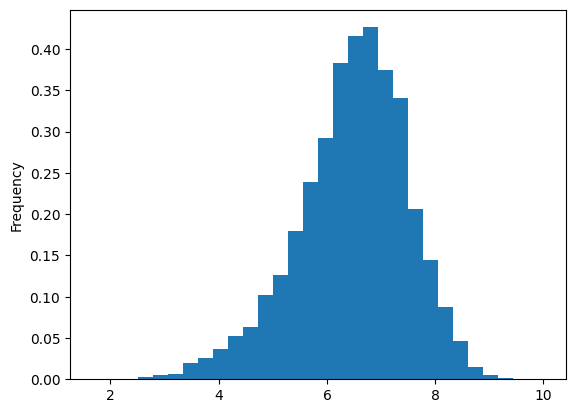

In [35]:
ax=df['rating'].plot.hist(density=True, bins=30)


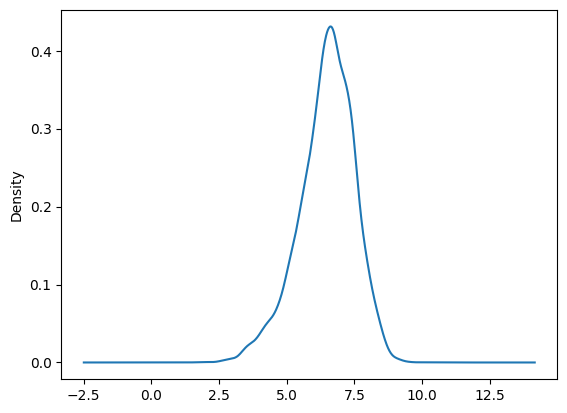

In [36]:
ax=df['rating'].plot.kde()

In [37]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [38]:
print(df.transpose().dtypes)


0        object
1        object
2        object
3        object
4        object
          ...  
12289    object
12290    object
12291    object
12292    object
12293    object
Length: 12294, dtype: object


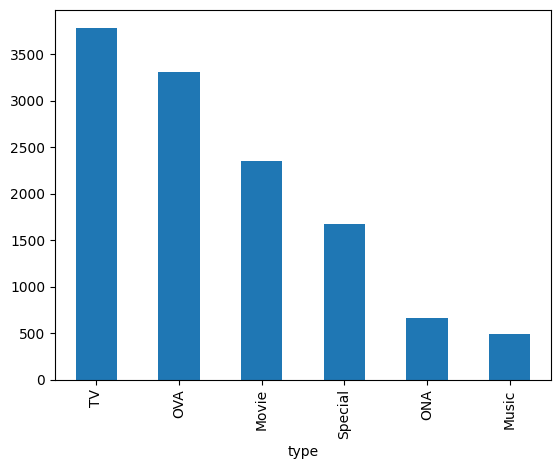

In [39]:
ax=barchart=df['type'].value_counts().plot(kind='bar')

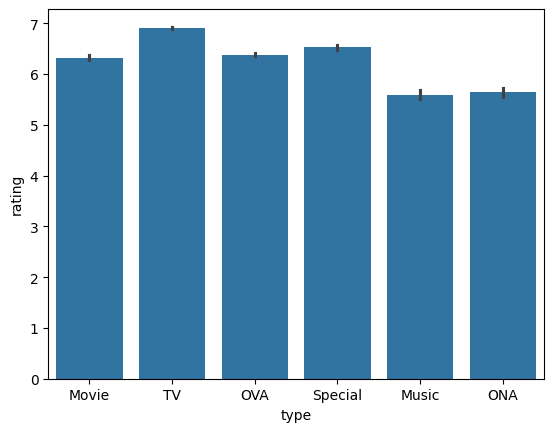

In [40]:
ax=sns.barplot(x='type', y='rating', data=df)

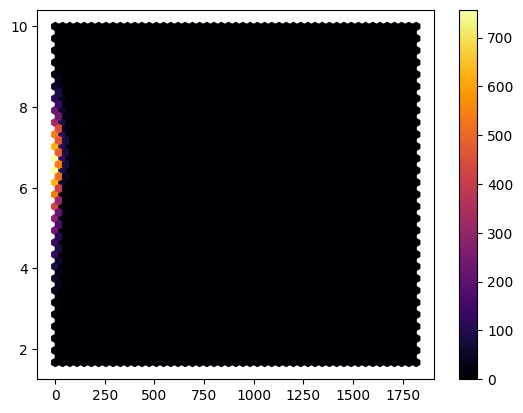

In [41]:
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')
ax = plt.hexbin(df['episodes'], df['rating'], gridsize=50, cmap='inferno')
plt.colorbar(ax)



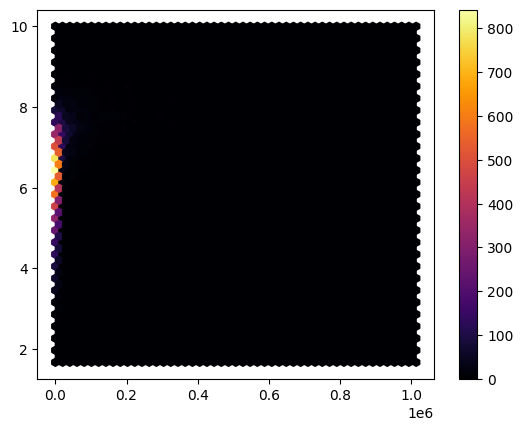

In [42]:
df['members'] = pd.to_numeric(df['members'], errors='coerce')
ax = plt.hexbin(df['members'], df['rating'], gridsize=50, cmap='inferno')
plt.colorbar(ax)

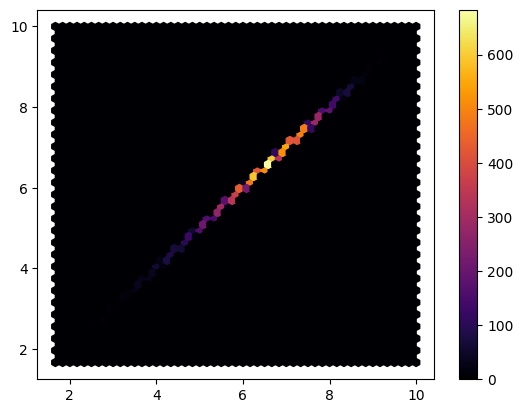

In [43]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
ax = plt.hexbin(df['rating'], df['rating'], gridsize=50, cmap='inferno')
plt.colorbar(ax)

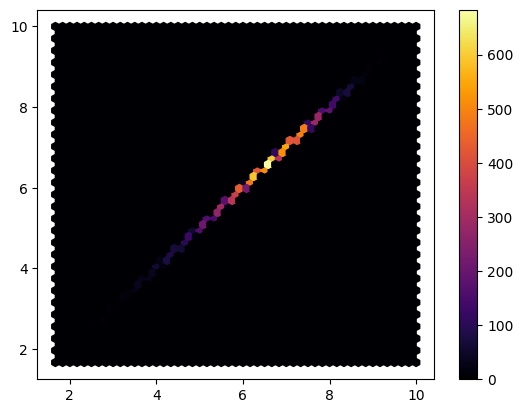

In [44]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
ax = plt.hexbin(df['rating'], df['rating'], gridsize=50, cmap='inferno')
plt.colorbar(ax)

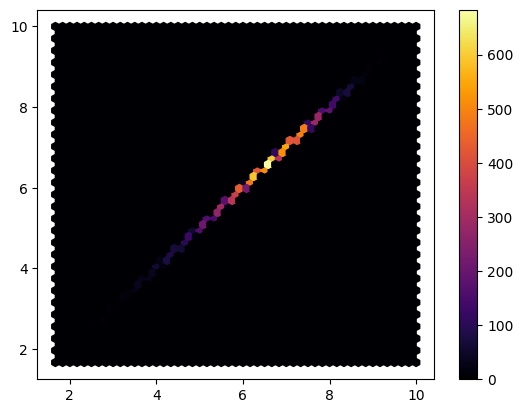

In [45]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
ax = plt.hexbin(df['rating'], df['rating'], gridsize=50, cmap='inferno')
plt.colorbar(ax)

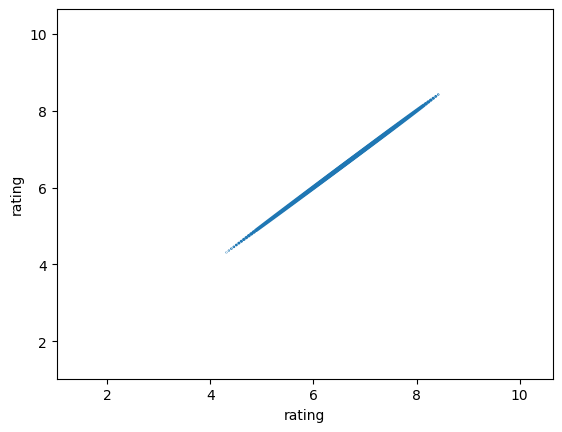

In [46]:
ax=sns.kdeplot(data=df, x='rating', y='rating')

<ipython-input-47-c7c57811296a>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  ax=sns.kdeplot(data=df, x='rating', y='rating', hue='type')
<ipython-input-47-c7c57811296a>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  ax=sns.kdeplot(data=df, x='rating', y='rating', hue='type')
<ipython-input-47-c7c57811296a>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  ax=sns.kdeplot(data=df, x='rating', y='rating', hue='type')
<ipython-input-47-c7c57811296a>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  ax=sns.kdeplot(data=df, x='rating', y='rating', hue='type')


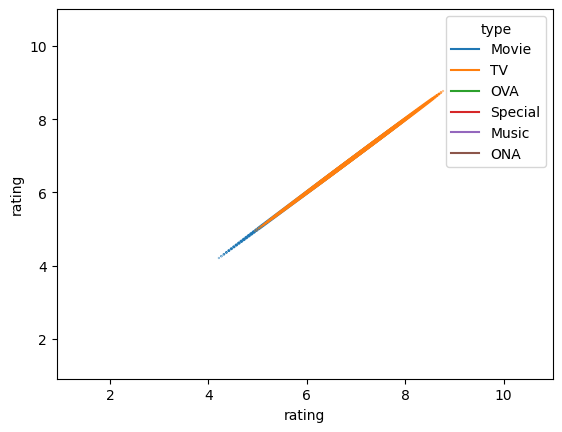

In [47]:
ax=sns.kdeplot(data=df, x='rating', y='rating', hue='type')


<ipython-input-48-a0f69e672f1d>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  ax=sns.kdeplot(data=df, x='rating', y='rating', hue='episodes')
<ipython-input-48-a0f69e672f1d>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  ax=sns.kdeplot(data=df, x='rating', y='rating', hue='episodes')
<ipython-input-48-a0f69e672f1d>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  ax=sns.kdeplot(data=df, x='rating', y='rating', hue='episodes')
<ipython-input-48-a0f69e672f1d>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  ax=sns.kdeplot(data=df, x='rating', y='rating', hue='episodes')
<ipython-input-48-a0f69e672f1d>:1: UserWarning: KDE cannot be estimated (0 variance or perfect c

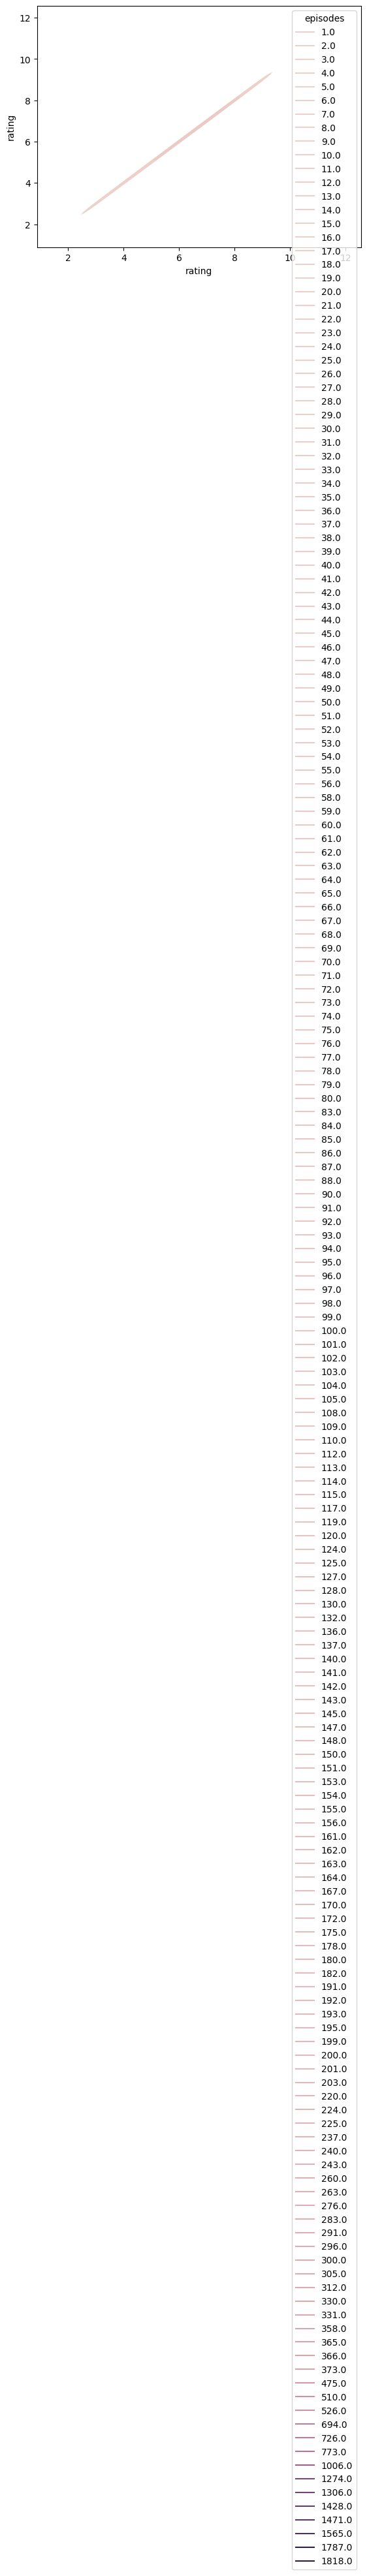

In [48]:
ax=sns.kdeplot(data=df, x='rating', y='rating', hue='episodes')

In [49]:
print(df.columns)


Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')


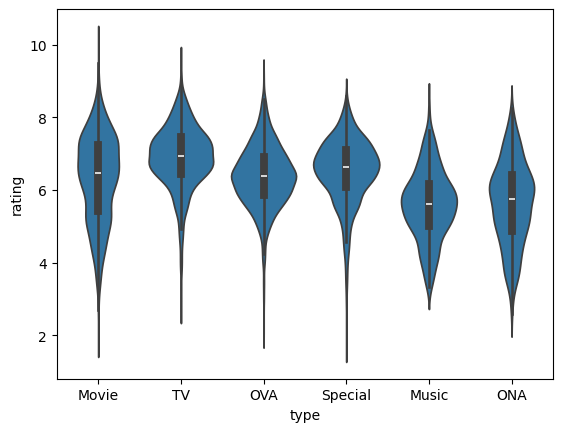

In [50]:
ax = sns.violinplot(x='type', y='rating', data=df) # Then retry plotting


In [51]:
#data samplin and distribution
df.describe()


,anime_id,episodes,rating,members
count,12294.000000,11954.000000,12064.000000,1.229400e+04
mean,14058.221653,12.382550,6.473902,1.807134e+04
std,11455.294701,46.865352,1.026746,5.482068e+04
min,1.000000,1.000000,1.670000,5.000000e+00
25%,3484.250000,1.000000,5.880000,2.250000e+02
50%,10260.500000,2.000000,6.570000,1.550000e+03
75%,24794.500000,12.000000,7.180000,9.437000e+03
max,34527.000000,1818.000000,10.000000,1.013917e+06


<ipython-input-52-4a25aab48407>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(norm_sample, fit=stats.norm, ax=ax)


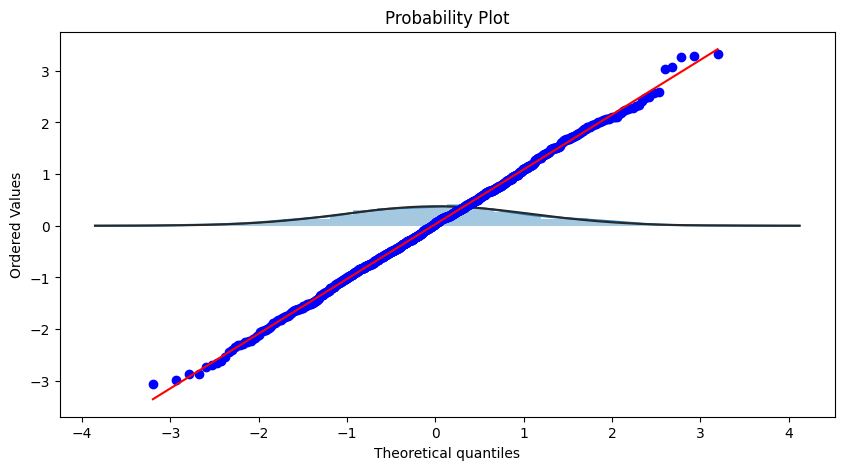

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Import the stats module from scipy
from scipy import stats

fig,ax=plt.subplots(figsize=(10,5))
norm_sample=stats.norm.rvs(size=1000)
sns.distplot(norm_sample, fit=stats.norm, ax=ax)
stats.probplot(norm_sample, plot=ax)
plt.show()

In [53]:
#creat 3d plot
import plotly.express as px
fig=px.scatter_3d(df, x='anime_id', y='rating', z='members', color='type')
fig.show()